In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [51]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from fbm.sim import hosking
from fbm.testing.chi_square import fBm_chi_square_test

In [52]:
size = 1002
fbm_gen = hosking.HoskingFBmGenerator()
path = fbm_gen.generate_fBm(H=0.3, size=size)

In [53]:
a = fbm_gen.ds[-1].size

In [13]:
contribution = np.zeros((1000, 1000))
for i in range(1000):
    contribution[i][:i+1] = fbm_gen.ds[i]
contribution

array([[-2.42141717e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.69859635e-01, -1.14469819e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.78188944e-01, -1.34105949e-01, -7.27642347e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.92610757e-01, -1.56738794e-01, -1.08523713e-01, ...,
        -2.00435853e-04,  0.00000000e+00,  0.00000000e+00],
       [-2.92610797e-01, -1.56738846e-01, -1.08523771e-01, ...,
        -2.59026821e-04, -2.00235181e-04,  0.00000000e+00],
       [-2.92610837e-01, -1.56738898e-01, -1.08523829e-01, ...,
        -2.90380062e-04, -2.58767556e-04, -2.00034911e-04]])

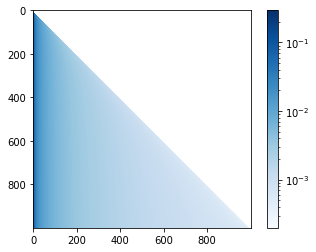

In [18]:
from matplotlib import colors
cmap = plt.cm.get_cmap("Blues").copy()
cmap.set_bad(color='white')

contribution = np.abs(contribution)
contribution = np.ma.masked_where(contribution == 0, contribution)
plt.imshow(contribution, cmap=cmap, norm=colors.LogNorm())
plt.colorbar()
plt.show()

H 0.1: 0.00040121112854738487
H 0.3: 0.00020003491091406217
H 0.7: 7.146845758321756e-05
H 0.9: 3.897418777903757e-05


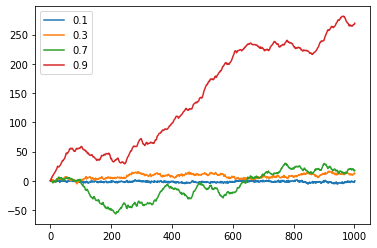

In [49]:
size = 1000
contributions = dict()
contributions['0.1'] = np.zeros((size, size))
contributions['0.3'] = np.zeros((size, size))
contributions['0.7'] = np.zeros((size, size))
contributions['0.9'] = np.zeros((size, size))

def assign_contribution(H, s):
    path = fbm_gen.generate_fBm(H=H, size=size + 2)
    plt.plot(np.arange(size+2), path, label=s)
    for i in range(size):
        contributions[s][i][:i+1] = fbm_gen.ds[i]
    contributions[s] = np.abs(contributions[s])
    contributions[s] = np.ma.masked_where(contributions[s] == 0, contributions[s])
    print(f'H {H}: {np.min(contributions[s])}')

assign_contribution(0.1, '0.1')
assign_contribution(0.3, '0.3')
assign_contribution(0.7, '0.7')
assign_contribution(0.9, '0.9')
plt.legend()
plt.show()

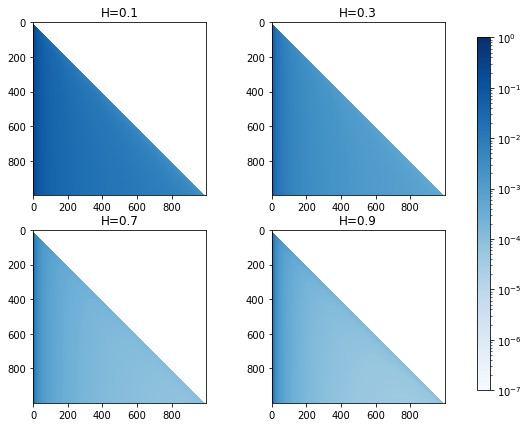

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,7))

cmap = plt.cm.get_cmap("Blues").copy()
cmap.set_bad(color='white')

vmin = min([np.min(i) for i in contributions.values()])

axes[0,0].set_title("H=0.1")
im0 = axes[0,0].imshow(contributions['0.1'], cmap=cmap, norm=colors.LogNorm(vmin=0.0000001, vmax=1))
axes[0,1].set_title("H=0.3")
im1 = axes[0,1].imshow(contributions['0.3'], cmap=cmap, norm=colors.LogNorm(vmin=0.0000001, vmax=1))
axes[1,0].set_title("H=0.7")
im2 = axes[1,0].imshow(contributions['0.7'], cmap=cmap, norm=colors.LogNorm(vmin=0.0000001, vmax=1))
axes[1,1].set_title("H=0.9")
im3 = axes[1,1].imshow(contributions['0.9'], cmap=cmap, norm=colors.LogNorm(vmin=0.0000001, vmax=1))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.15, 0.02, 0.7])
fig.colorbar(im3, cax=cbar_ax)
plt.show()


H 0.1: 6.855206503686629e-07
H 0.3: 3.155684732151586e-06
H 0.7: 5.101203225871556e-06
H 0.9: 1.546337588775592e-06


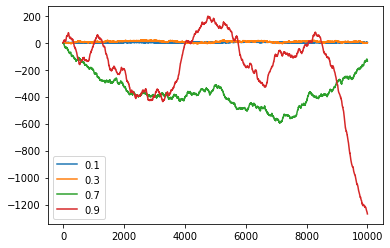

In [42]:
size = 10000
contributions = dict()
contributions['0.1'] = np.zeros((size, size))
contributions['0.3'] = np.zeros((size, size))
contributions['0.7'] = np.zeros((size, size))
contributions['0.9'] = np.zeros((size, size))

def assign_contribution(H, s):
    path = fbm_gen.generate_fBm(H=H, size=size + 2)
    plt.plot(np.arange(size+2), path, label=s)
    for i in range(size):
        contributions[s][i][:i+1] = fbm_gen.ds[i]
        contributions[s][i][:i+1] /= np.sum(contributions[s][i])
    contributions[s] = np.abs(contributions[s])
    contributions[s] = np.ma.masked_where(contributions[s] == 0, contributions[s])
    print(f'H {H}: {np.min(contributions[s])}')

assign_contribution(0.1, '0.1')
assign_contribution(0.3, '0.3')
assign_contribution(0.7, '0.7')
assign_contribution(0.9, '0.9')
plt.legend()
plt.show()

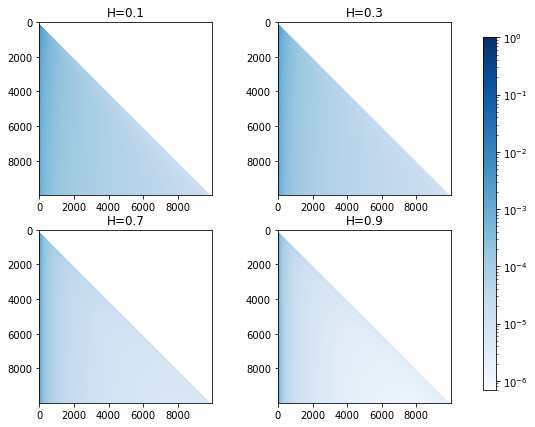

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,7))

cmap = plt.cm.get_cmap("Blues").copy()
cmap.set_bad(color='white')

vmin = min([np.min(i) for i in contributions.values()])

axes[0,0].set_title("H=0.1")
im0 = axes[0,0].imshow(contributions['0.1'], cmap=cmap, norm=colors.LogNorm(vmin=vmin, vmax=1))
axes[0,1].set_title("H=0.3")
im1 = axes[0,1].imshow(contributions['0.3'], cmap=cmap, norm=colors.LogNorm(vmin=vmin, vmax=1))
axes[1,0].set_title("H=0.7")
im2 = axes[1,0].imshow(contributions['0.7'], cmap=cmap, norm=colors.LogNorm(vmin=vmin, vmax=1))
axes[1,1].set_title("H=0.9")
im3 = axes[1,1].imshow(contributions['0.9'], cmap=cmap, norm=colors.LogNorm(vmin=vmin, vmax=1))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.15, 0.02, 0.7])
fig.colorbar(im3, cax=cbar_ax)
plt.show()


In [28]:
print(contributions['0.1'])

[[0.42565082250148245 -- -- ... -- -- --]
 [0.5332623493144013 0.25281644278402415 -- ... -- -- --]
 [0.5771358348019873 0.34535820029822245 0.1735388925041799 ... -- -- --]
 ...
 [0.6567003646865599 0.49336696585078255 0.3984231048167382 ...
  0.00040201745871091844 -- --]
 [0.656700526142355 0.49336723349703615 0.39842345238926186 ...
  0.0006657574460471251 0.00040161388894932116 --]
 [0.6567006872743166 0.49336750060633244 0.39842379926429217 ...
  0.0008637018705867721 0.0006650894481605568 0.00040121112854738487]]


In [29]:
print(contributions['0.3'])

[[0.242141716744801 -- -- ... -- -- --]
 [0.2698596353358025 0.11446981942485382 -- ... -- -- --]
 [0.2781889441411163 0.13410594926322444 0.07276423468791918 ... -- -- --]
 ...
 [0.29261075655119423 0.1567387943431183 0.1085237128613118 ...
  0.00020043585309031817 -- --]
 [0.2926107966855036 0.15673884626141887 0.1085237711223361 ...
  0.0002590268209780131 0.00020023518129773217 --]
 [0.29261083673953026 0.15673889807582594 0.1085238292667291 ...
  0.0002903800621266889 0.00025876755594520965 0.00020003491091406217]]


In [30]:
print(contributions['0.7'])

[[0.3195079107728942 -- -- ... -- -- --]
 [0.28866882648888736 0.09652056567052339 -- ... -- -- --]
 [0.282066581473533 0.07677490517284047 0.06840246914726367 ... -- -- --]
 ...
 [0.26848794080805605 0.06381228939541354 0.04359992745452647 ...
  0.00020041215439713065 -- --]
 [0.26848790068323203 0.06381226000337481 0.04359990059342476 ...
  0.00014665777301141748 0.0002002115298881992 --]
 [0.2684878606386619 0.0638122306701617 0.043599873786115184 ...
  0.00013389459937916632 0.00014651091351138593 0.0002000113086666444]]


In [31]:
print(contributions['0.9'])

[[0.7411011265922482 -- -- ... -- -- --]
 [0.608088537720819 0.17947967436380974 -- ... -- -- --]
 [0.5821269400628092 0.09152013235597857 0.1446492353523271 ... -- -- --]
 ...
 [0.5256419691524807 0.05586016982681486 0.056548824577504 ...
  0.0004008686102448038 -- --]
 [0.5256418086176957 0.055860093514850974 0.056548757156338385 ...
  0.00019036617032197432 0.00040046733761049045 --]
 [0.5256416484040569 0.055860017355688935 0.056548689870283504 ...
  0.00016801840807911843 0.00019017556355948605 0.00040006668153741095]]


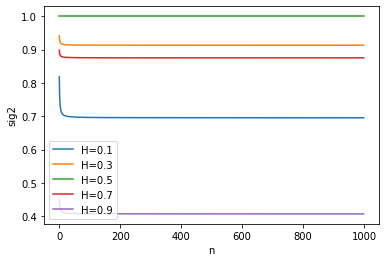

In [57]:
size=1000
def sig2_converge_plot(H):
    fbm_gen.generate_fBm(H=H, size=size+2)
    plt.plot(fbm_gen.sig2, label=f'H={H}')
sig2_converge_plot(0.1)
sig2_converge_plot(0.3)
sig2_converge_plot(0.5)
sig2_converge_plot(0.7)
sig2_converge_plot(0.9)
plt.legend()
plt.ylabel('sig2')
plt.xlabel('n')
plt.show()
